In [5]:
import numpy as np
import pandas as pd
import re,string,unicodedata
import os

# NLP Libs
import nltk
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
#from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#ML Algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             matthews_corrcoef,
                             cohen_kappa_score,
                             roc_auc_score)

In [6]:
# Import our data

df=pd.read_csv('/content/train.csv')

In [7]:
df.shape

(20800, 5)

In [8]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [9]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


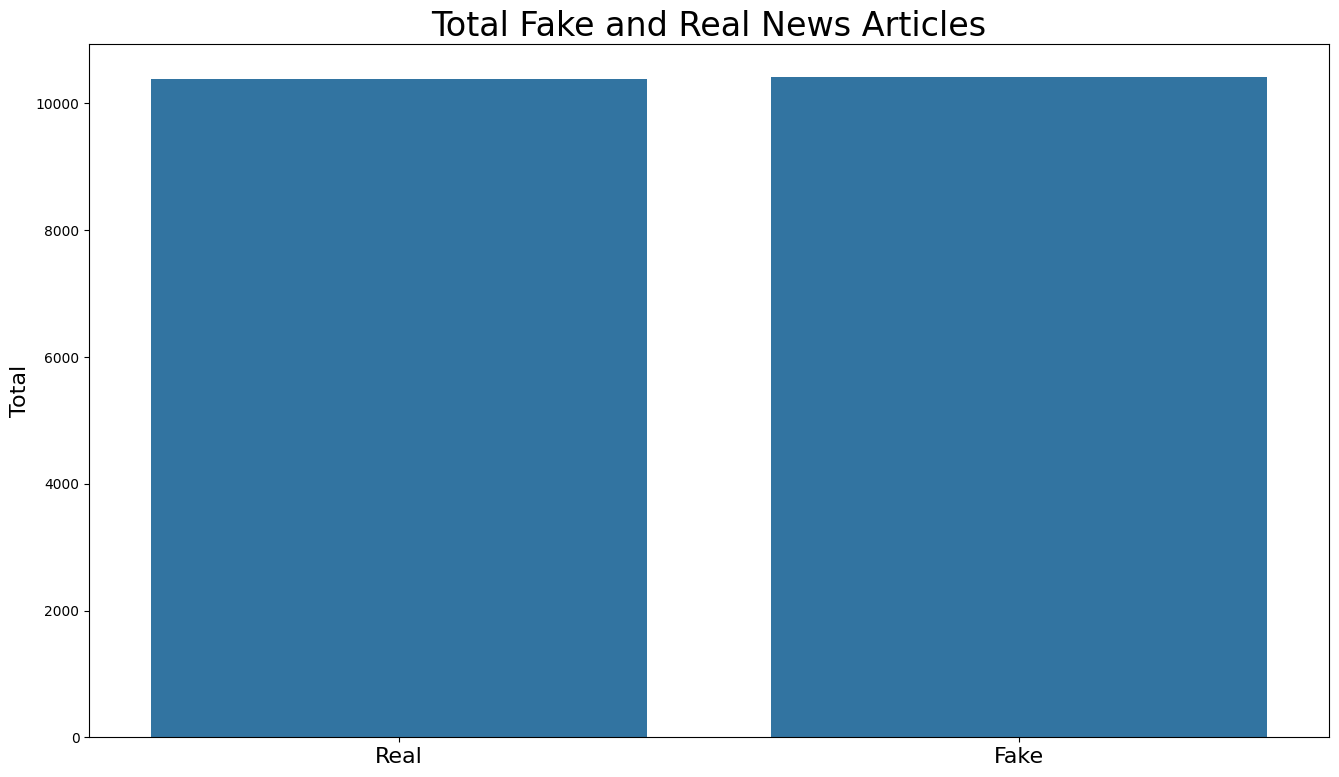

In [10]:
# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))

#sns.countplot(df.label)
sns.countplot(data=df, x='label')

plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([1, 0], ['Fake', 'Real'], fontsize=16)

plt.show()

In [11]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
df=df.fillna(' ')

df['total']=df['title']+' '+df['author']+' '+df['text']

In [13]:
df.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [14]:
df = df.drop(['id','title','author','text'],axis = 1)

In [15]:
df.head()

,label,total
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired Consortiumne...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...


In [16]:
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

for index, row in df.iterrows():
    try:
        filter_sentence = ''
        sentence = row['total']
        sentence = re.sub(r'[^\w\s]', '', sentence)  # Cleaning punctuation
        words = nltk.word_tokenize(sentence)  # Tokenization
        words = [w.lower() for w in words if not w in stop_words]  # Stopwords removal

        for word in words:
            filter_sentence += ' ' + str(lemmatizer.lemmatize(word)).lower()

        df.loc[index, 'total'] = filter_sentence  # Update the row with the filtered sentence

    except Exception as e:
        print(f"Error processing row {index}: {e}")
        continue  # Skip the problematic row and move to the next


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************

Error processing row 20592: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt/PY3/english.pickle

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************

Error processing row 20593: 
************

In [17]:
df.head()

,label,total
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired Consortiumne...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...


In [18]:
X_train = df['total']
Y_train = df['label']

In [19]:
# CountVectorizer
count_vectorizer = CountVectorizer()
freq_term_matrix = count_vectorizer.fit_transform(X_train)

# TF-IDF Transformation
tfidf = TfidfTransformer(norm="l2")
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [20]:
tf_idf_matrix

<20800x182061 sparse matrix of type '<class 'numpy.float64'>'
	with 6954998 stored elements in Compressed Sparse Row format>

In [21]:
test_counts = count_vectorizer.transform(df['total'].values)
test_tfidf = tfidf.transform(test_counts)

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

# Sample data (replace this with your dataset)
X = tf_idf_matrix  # Features
y = Y_train    # Target labels (0 or 1)

# Create an instance of StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Now, X_train and y_train contain the training data and labels, and X_test and y_test contain the test data and labelss

In [23]:
print(X_train.shape, X_test.shape)

(16640, 182061) (4160, 182061)


In [24]:
print(y_train.shape, y_test.shape)

(16640,) (4160,)


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [26]:
def get_evaluation_result(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    mcc = matthews_corrcoef(y_test, pred)
    kappa = cohen_kappa_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    # print('Accuracy on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
    # print('Accuracy on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    # print('====================================')
    # Print the results
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Matthews Correlation Coefficient: {mcc}")
    print(f"Cohen's Kappa: {kappa}")
    print(f"AUC-ROC: {roc_auc}")
    print('====================================')
    print('classification_report: ')
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    cm
    ConfusionMatrixDisplay.from_predictions(y_test,pred)
    return model

Accuracy: 0.9420673076923077
Precision: 0.9600399600399601
Recall: 0.9227076332213154
F1 Score: 0.9410036719706243
Matthews Correlation Coefficient: 0.8848119738837784
Cohen's Kappa: 0.8841408818032679
AUC-ROC: 0.9420952706308791
classification_report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2077
           1       0.96      0.92      0.94      2083

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160



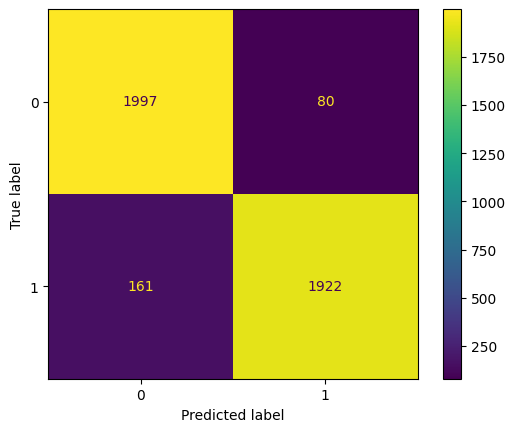

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

RF = get_evaluation_result(rf, X_train, X_test, y_train, y_test)

Accuracy: 0.9701923076923077
Precision: 0.9837037037037037
Recall: 0.9563130100816131
F1 Score: 0.9698149951314509
Matthews Correlation Coefficient: 0.9407526740788809
Cohen's Kappa: 0.9403868889060952
AUC-ROC: 0.9702123548241479
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2077
           1       0.98      0.96      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



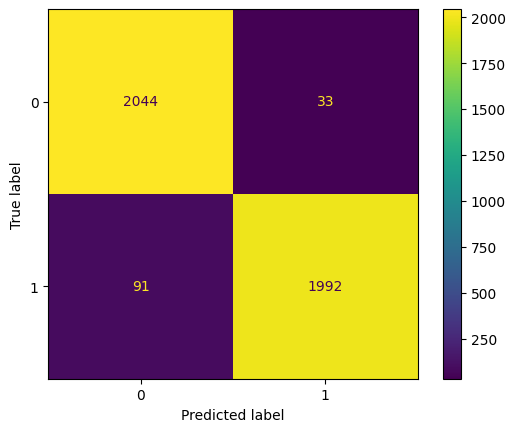

In [29]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
PERCEPTON = get_evaluation_result(perceptron, X_train, X_test, y_train, y_test)

Accuracy: 0.9754807692307692
Precision: 0.9768897448242657
Recall: 0.9740758521363418
F1 Score: 0.9754807692307692
Matthews Correlation Coefficient: 0.9509655969606076
Cohen's Kappa: 0.9509616404736584
AUC-ROC: 0.9754827984803038
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2077
           1       0.98      0.97      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



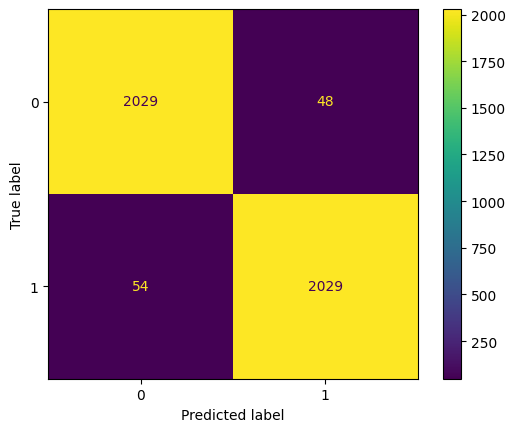

In [30]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()

SGD = get_evaluation_result(sgd_classifier, X_train, X_test, y_train, y_test)

Accuracy: 0.9608173076923077
Precision: 0.9642166344294004
Recall: 0.957273163706193
F1 Score: 0.960732353649723
Matthews Correlation Coefficient: 0.9216592334080705
Cohen's Kappa: 0.9216352674580186
AUC-ROC: 0.9608224268218013
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2077
           1       0.96      0.96      0.96      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



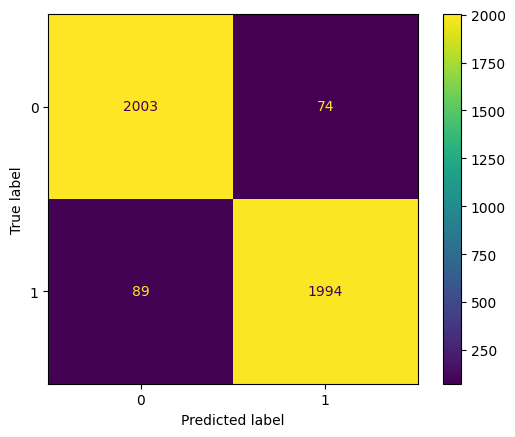

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)

DT = get_evaluation_result(dt_classifier, X_train, X_test, y_train, y_test)

Accuracy: 0.9615384615384616
Precision: 0.9633734939759037
Recall: 0.9596735477676428
F1 Score: 0.9615199615199616
Matthews Correlation Coefficient: 0.9230840172973191
Cohen's Kappa: 0.923077189774906
AUC-ROC: 0.9615411552030318
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2077
           1       0.96      0.96      0.96      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



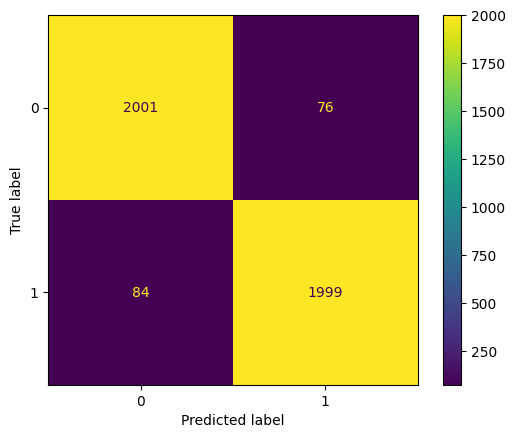

In [27]:
from sklearn.linear_model import LogisticRegression
lbfgs = LogisticRegression(solver='lbfgs')

LGFG = get_evaluation_result(lbfgs, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9639423076923077
Precision: 0.9653346172363987
Recall: 0.9625540086413826
F1 Score: 0.9639423076923077
Matthews Correlation Coefficient: 0.9278886258777813
Cohen's Kappa: 0.9278847654024388
AUC-ROC: 0.9639443129388907
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2077
           1       0.97      0.96      0.96      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



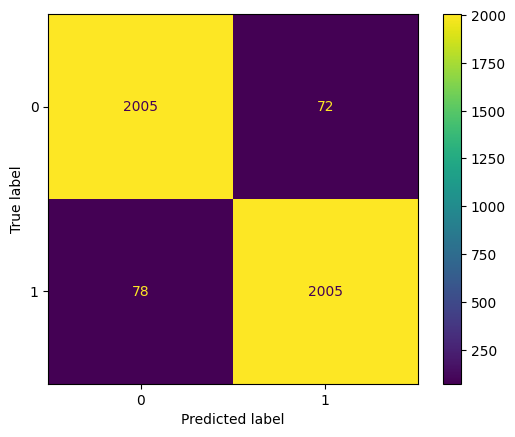

In [32]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=0)

ADA = get_evaluation_result(adaboost_classifier, X_train, X_test, y_train, y_test)

In [33]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [36]:
def output_lable(n):
    if n == 1:
        return "Fake News"
    elif n == 0:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    #new_xv_test = tf_idf_matrix.transform(new_x_test)
    #pred_LR = LGFG.predict(new_xv_test)
    new_xv_test = count_vectorizer.transform(new_x_test)
    new_xv_test = tfidf.transform(new_xv_test)
    #=========================================
    pred_RF = RF.predict(new_xv_test)
    pred_PERCEPTON = PERCEPTON.predict(new_xv_test)
    pred_SGD = SGD.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_LGFG = LGFG.predict(new_xv_test)
    pred_ADA = ADA.predict(new_xv_test)
    return print("\nRandomForest Prediction: {} \nPerceptron Prediction: {} \nSGD Prediction: {} \nDecision Tree Prediction: {} \nLogistic Regression Prediction: {} \nAdaBoost Prediction: {} ".format(output_lable(pred_RF[0]), output_lable(pred_PERCEPTON[0]), output_lable(pred_SGD[0]), output_lable(pred_DT[0]), output_lable(pred_LGFG[0]), output_lable(pred_ADA[0])))

In [37]:
title = str(input("Please Enter news title: \n"))
author = str(input("Please Enter news author: \n"))
text =  str(input("Please Enter news content: \n"))
news = title + ' ' + author + ' ' + ' ' + text
manual_testing(news)

Please Enter news title: 
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times
Please Enter news author: 
Daniel Victor
Please Enter news content: 
If at first you donâ€™t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. He will hold a workout for M. L. B. teams this month, his agents told ESPN and other news outlets. â€œThis may sound like a publicity stunt, but nothing could be further from the truth,â€ said Brodie Van Wagenen,   of CAA Baseball, part of the sports agency CAA Sports, in the statement. â€œI have seen Timâ€™s workouts, and people inside and outside the industry  â€”   scouts, executives, players and fans  â€”   will be impressed by his talent. â€ Itâ€™s been over a decade since Tebow, 28, has played baseball full time, which means a comeback would be no easy task. But the former major league catch

In [ ]:
import tkinter as tk
from tkinter import messagebox

def testing(model, news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  #new_xv_test = tf_idf_matrix.transform(new_x_test)
  #pred_LR = LGFG.predict(new_xv_test)
  new_xv_test = count_vectorizer.transform(new_x_test)
  new_xv_test = tfidf.transform(new_xv_test)
  #=========================================
  pred = model.predict(new_xv_test)
  return print("\Model Prediction: {} ".format(output_lable(pred[0])))

# Assuming placeholder functions for model predictions
# These would ideally call the prediction functions from the user's uploaded script.
def predict_decision_tree(title, author, content):
    news = title + ' ' + author + ' ' + ' ' + text
    testing(DT, news)

def predict_random_forest(title, author, content):
    news = title + ' ' + author + ' ' + ' ' + text
    testing(RF, news)

def predict_adaboost(title, author, content):
    news = title + ' ' + author + ' ' + ' ' + text
    testing(ADA, news)

def predict_sgd_classifier(title, author, content):
    news = title + ' ' + author + ' ' + ' ' + text
    testing(SGD, news)

def predict_perceptron(title, author, content):
    news = title + ' ' + author + ' ' + ' ' + text
    testing(PERCEPTON, news)

def predict_logistic_regression(title, author, content):
    news = title + ' ' + author + ' ' + ' ' + text
    testing(LGFG, news)

# Function to create prediction based on model type
def make_prediction(model_type):
    title = title_entry.get()
    author = author_entry.get()
    content = news_entry.get("1.0", tk.END).strip()

    if not (title and author and content):
        messagebox.showwarning("Input Error", "All fields must be filled out.")
        return

    # Map model type to prediction function
    prediction_functions = {
        "Decision Tree": predict_decision_tree,
        "Random Forest": predict_random_forest,
        "AdaBoost": predict_adaboost,
        "SGD Classifier": predict_sgd_classifier,
        "Perceptron": predict_perceptron,
        "Logistic Regression": predict_logistic_regression
    }

    prediction = prediction_functions[model_type](title, author, content)
    messagebox.showinfo(f"{model_type} Prediction", f"The news is predicted to be: {prediction}")

# Set up Tkinter window
app = tk.Tk()
app.title("Fake News Detection")

# Labels and Entries for Title, Author, and News Content
tk.Label(app, text="Title:").grid(row=0, column=0, padx=10, pady=5)
title_entry = tk.Entry(app, width=50)
title_entry.grid(row=0, column=1, padx=10, pady=5)

tk.Label(app, text="Author:").grid(row=1, column=0, padx=10, pady=5)
author_entry = tk.Entry(app, width=50)
author_entry.grid(row=1, column=1, padx=10, pady=5)

tk.Label(app, text="News Content:").grid(row=2, column=0, padx=10, pady=5)
news_entry = tk.Text(app, width=50, height=10)
news_entry.grid(row=2, column=1, padx=10, pady=5)

# Buttons for each model
model_buttons = [
    ("Decision Tree", 0),
    ("Random Forest", 1),
    ("AdaBoost", 2),
    ("SGD Classifier", 3),
    ("Perceptron", 4),
    ("Logistic Regression", 5)
]

for model, row in model_buttons:
    tk.Button(app, text=model, command=lambda m=model: make_prediction(m)).grid(row=3+row, column=1, pady=5)

app.mainloop()
